In [1]:
import sys
sys.path.append('../python_packages_static/')
import pandas as pd
import numpy as np
import os
import pyemu
import matplotlib as mpl
import matplotlib.pyplot as plt

# read in the PST file and the Morris output (in the MSN file)

### NOTE: Make sure  `run_ensemble` is set appropriately - If `run_ensemble` is set to `True`, local runs are performed. If `run_ensemble` set to `False`results from the journal article are used. 

In [2]:
run_ensemble=False

In [3]:
if run_ensemble==True:
    resdir = '../run_data'
else:
    resdir = '../output/parallel'
pstfile = 'prior_mc_wide_sens.pst'

In [4]:
pst = pyemu.Pst(os.path.join(resdir, pstfile))

In [5]:
morris_sum_file = os.path.join(resdir, pstfile.replace('.pst','.msn'))

In [6]:
morris_sum_df = pd.read_csv(morris_sum_file, index_col=0)

## Set up the parameter names

In [7]:
pardata = pst.parameter_data
morris_sum_df['pargp']=pardata.loc[pardata.index.isin(morris_sum_df.index)].pargp

In [8]:
morris_sum_df.set_index(morris_sum_df.pargp, drop=True, inplace=True)

In [9]:
morris_sum_df

,n_samples,sen_mean,sen_mean_abs,sen_std_dev,pargp
pargp,,,,,
wel,4,-8.621800e+01,8.902390e+01,176.178,wel
chd,4,6.914140e+01,1.282420e+02,130.583,chd
k_pp_:0,4,-2.365130e+05,2.365660e+05,472635.000,k_pp_:0
zn_k__multiplier,4,7.016140e+05,2.062450e+06,3459860.000,zn_k__multiplier
k_pp_:1,4,1.495990e+03,1.516300e+03,3017.830,k_pp_:1
k_pp_:2,4,-1.706830e+03,1.709030e+03,3401.120,k_pp_:2
k_pp_:3,4,4.318100e+06,4.319280e+06,8629450.000,k_pp_:3
k33_pp_:0,4,-5.553930e+02,5.591050e+02,1115.730,k33_pp_:0
zn_k33__multiplier,4,-1.476890e+05,1.600610e+05,312042.000,zn_k33__multiplier


In [10]:
renames = {'k_pp_:0':'Kh PPs: Layer 1',
'k_pp_:1':'Kh PPs: Layer 2',
'k_pp_:2':'Kh PPs: Layer 3',
'k_pp_:3':'Kh PPs: Layer 4',
'k33_pp_:0':'Kv PPs: Layer 1',
'k33_pp_:1':'Kv PPs: Layer 2',
'k33_pp_:2':'Kv: Layer 3',
'k33_pp_:3':'Kv PPs: Layer 4' ,
'rch_pp_:0':'Recharge PPs',
'pp_rch__multiplier':'Mean Recharge',
'sfrk':'SFR K by reach',
'wel':'Well Pumping',
'chd': 'Constant Head',
'zn_k__multiplier':'Kh by Zone',
'zn_k33__multiplier':'Kv by Zone'}

## Just make a barchart of the renamed parameter groups to show the relative sensitivity. We plot the log because the elemetary effects span orders of magnitude

In [11]:
if ' sen_mean_abs' in morris_sum_df.columns:
    morris_sum_df = morris_sum_df.rename(columns={' sen_mean_abs':'sen_mean_abs'}) # remove space in df column name

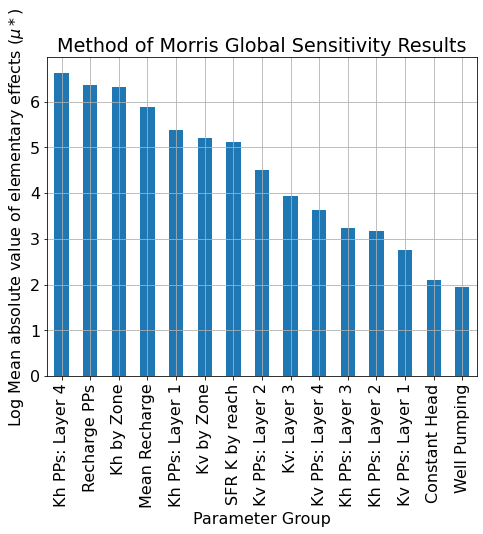

In [12]:
from matplotlib.ticker import ScalarFormatter

morris_sum_df.index = [renames[i] for i in morris_sum_df.index]
mpl.rcParams.update({'font.size':16})

ax = morris_sum_df.sort_values(by='sen_mean_abs',ascending=False).sen_mean_abs.apply(np.log10).plot.bar(figsize=(7,7))
#ax.set_yscale('log')
ax.set_ylabel('Log Mean absolute value of elementary effects ($\mu*$)')
ax.set_xlabel('Parameter Group')
ax.yaxis.set_major_formatter(ScalarFormatter())

ax.ticklabel_format(useOffset=False,style='plain', axis='y', )
ax.grid()
plt.tight_layout()
plt.title('Method of Morris Global Sensitivity Results')
plt.savefig('../figures/morris_plot.pdf')